<a href="https://colab.research.google.com/github/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/blob/main/Actividad_3/Actividad_3_GallardoFelipe_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Felipe Gallardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


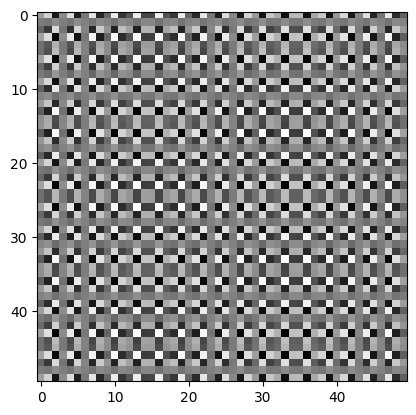

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

# Definir el rango de valores para x e y
x = np.linspace(-50, 50, 50)
y = np.linspace(-50, 50, 50)

# Crear una cuadrícula de valores x, y
X, Y = np.meshgrid(x, y)

Z = np.sin(X) * np.cos(2*Y)

plt.imshow(Z, cmap='gray')
plt.show()

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


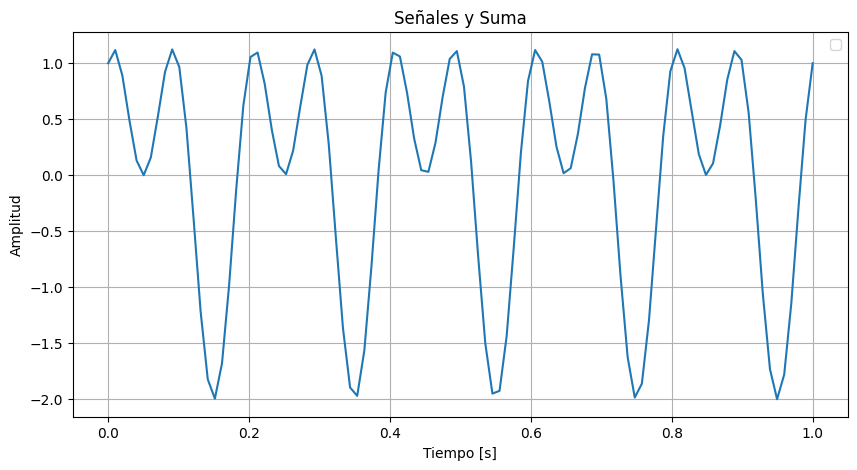

In [36]:
# Definir el tiempo
f = 5
t1 = np.linspace(0, 1, 100)

# Señales senoidales
sen = np.sin(2 * np.pi * f * t1)
cos = np.cos(2 * 2 * np.pi * f * t1)

y = sen + cos

# Graficar las señales
plt.figure(figsize=(10,5))
plt.plot(t1, y)
plt.title('Señales y Suma')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

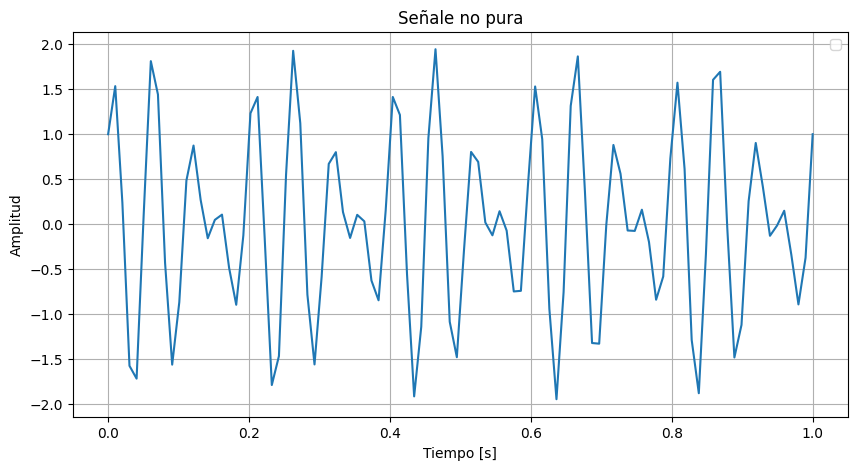

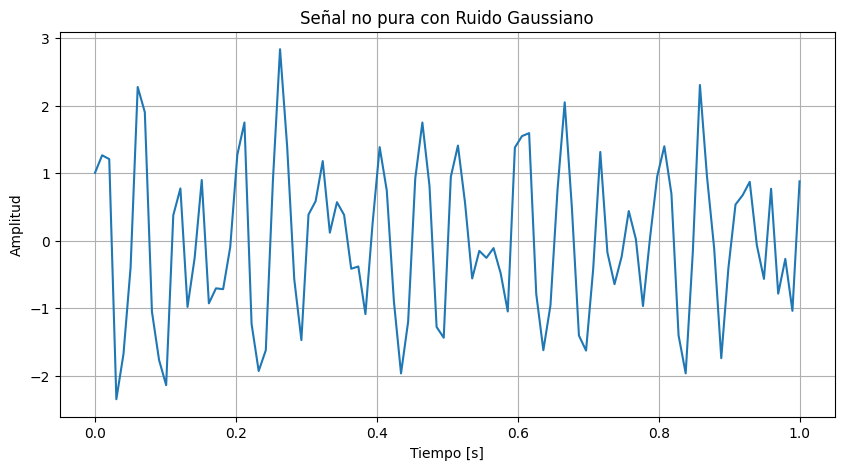

In [38]:
# Señal no pura
cos2 = np.cos(3 * 2 * np.pi * f * t1)
sen2 = np.sin(4 * 2 * np.pi * f * t1)

y2 = cos2 + sen2

# Grafica señal no pura
plt.figure(figsize=(10,5))
plt.plot(t1, y2)
plt.title('Señale no pura')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# Ruido gaussiano
ruido = np.random.normal(0, 0.5, 100)

y2_R = y2 + ruido

# Grafica señal con ruido
plt.figure(figsize=(10,5))
plt.plot(t1, y2_R)
plt.title('Señal no pura con Ruido Gaussiano')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()



## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


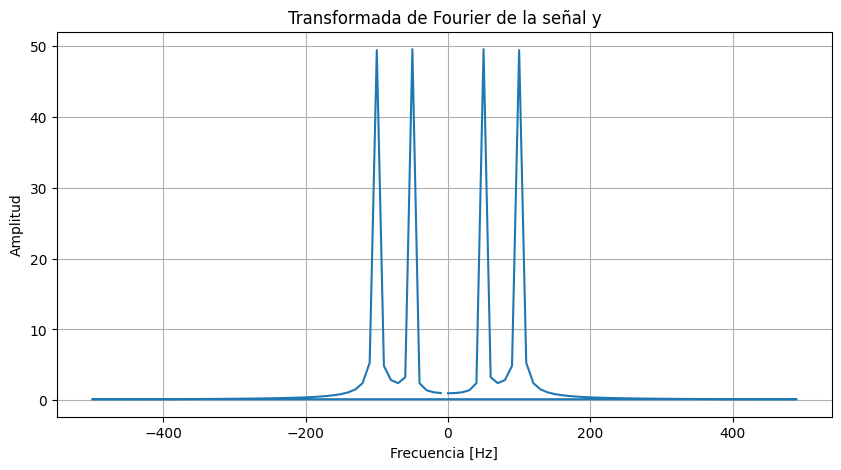

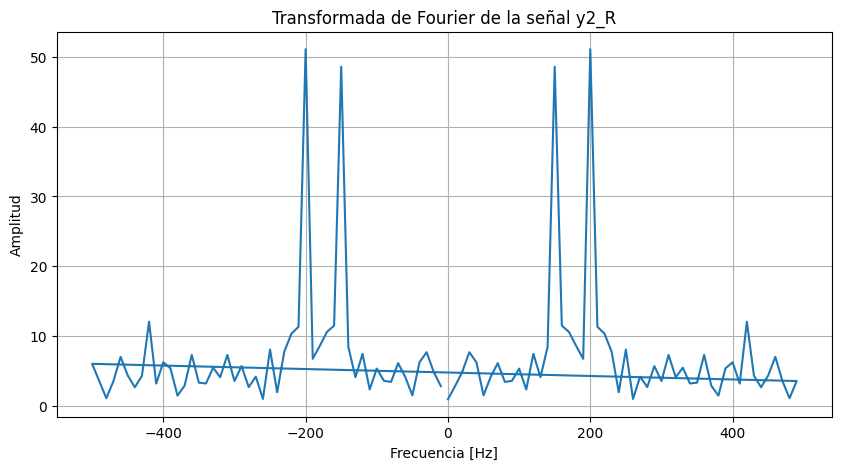

In [39]:
# Transformadas de Fourier para las señales
y_fft = fft(y)

y2_R_fft = fft(y2_R)

# Frecuencias para cada señal
frecuencias_y = fftfreq(len(y), 1/1000)
frecuencias_y2_R = fftfreq(len(y2_R), 1/1000)

# Grafica de la transformada de Fourier para la señal y
plt.figure(figsize=(10,5))
plt.plot(frecuencias_y, np.abs(y_fft))
plt.title('Transformada de Fourier de la señal y')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Grafica de la transformada de Fourier para la señal y2_R
plt.figure(figsize=(10,5))
plt.plot(frecuencias_y2_R, np.abs(y2_R_fft))
plt.title('Transformada de Fourier de la señal y2_R')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

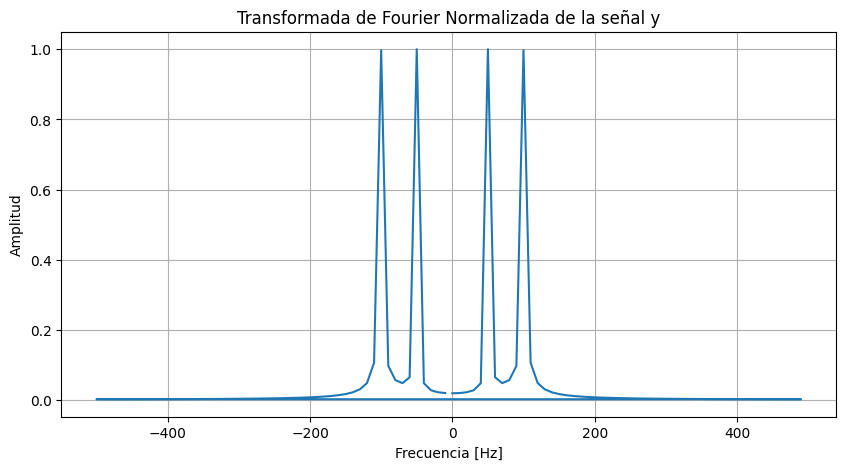

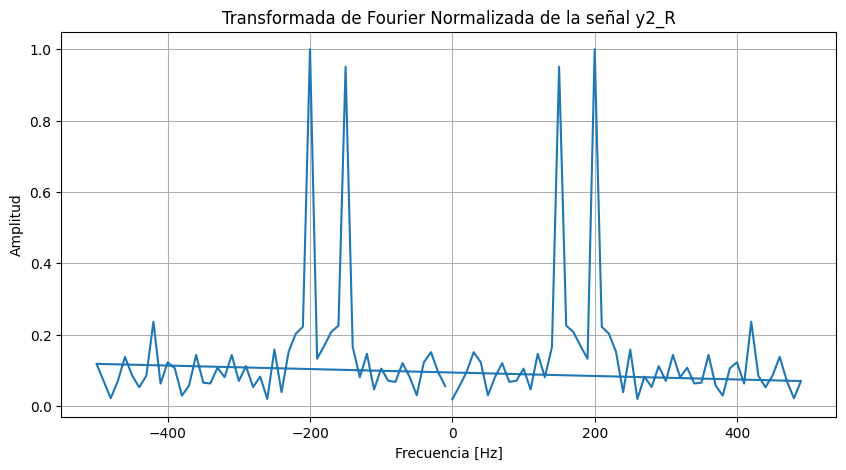

In [40]:
# Normalizado de las transformadas de Fourier
y_fft_norm = y_fft / np.max(np.abs(y_fft))

y2_R_fft_norm = y2_R_fft / np.max(np.abs(y2_R_fft))
"""
 Normalizado de las transformadas de Fourier
y_fft_norm = y_fft / len(y)

y2_R_fft_norm = y2_R_fft / len(y2_R)
"""
# Grafica de la Transformada de Fourier normalizada para la señal y
plt.figure(figsize=(10,5))
plt.plot(frecuencias_y, np.abs(y_fft_norm))
plt.title('Transformada de Fourier Normalizada de la señal y')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Grafica de la Transformada de Fourier normalizada para la señal y2_R
plt.figure(figsize=(10,5))
plt.plot(frecuencias_y2_R, np.abs(y2_R_fft_norm))
plt.title('Transformada de Fourier Normalizada de la señal y2_R')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

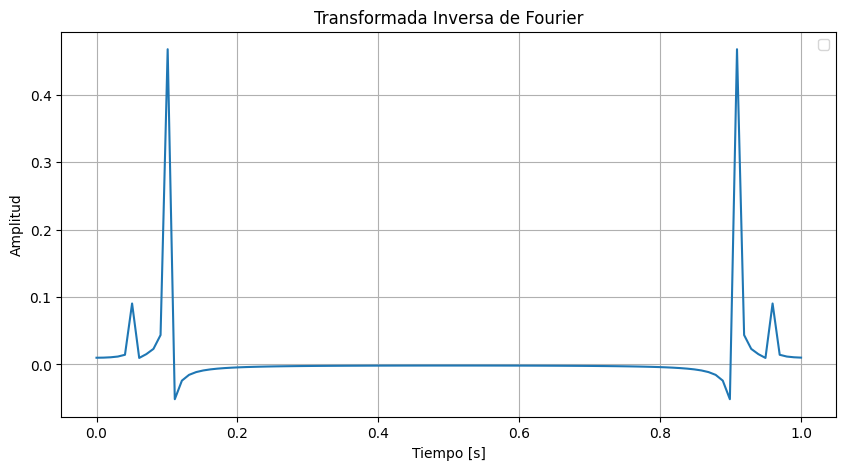

In [42]:
from numpy.fft import ifft

"""
# Transformada de Fourier de la señal y
y_fft = fft(y)
"""
# Transformada Inversa de Fourier
y_inv = ifft(y)

# Grafica de la señal obtenida con la Transformada Inversa de Fourier
plt.figure(figsize=(10,5))
#plt.plot(t1, y, label='Original')
plt.plot(t1, y_inv.real)
plt.title('Transformada Inversa de Fourier')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

[[ 1.00000000e+00  9.66258743e-01  1.05537873e+00 ... -1.98429366e+00
   3.39541661e-03 -1.99937067e+00]
 [ 9.66258743e-01  9.33655958e-01  1.01976893e+00 ... -1.91734110e+00
   3.28085099e-03 -1.93190939e+00]
 [ 1.05537873e+00  1.01976893e+00  1.11382427e+00 ... -2.09418133e+00
   3.58345048e-03 -2.11009328e+00]
 ...
 [-1.98429366e+00 -1.91734110e+00 -2.09418133e+00 ...  3.93742135e+00
  -6.73750367e-03  3.96733855e+00]
 [ 3.39541661e-03  3.28085099e-03  3.58345048e-03 ... -6.73750367e-03
   1.15288540e-05 -6.78869638e-03]
 [-1.99937067e+00 -1.93190939e+00 -2.11009328e+00 ...  3.96733855e+00
  -6.78869638e-03  3.99748308e+00]]


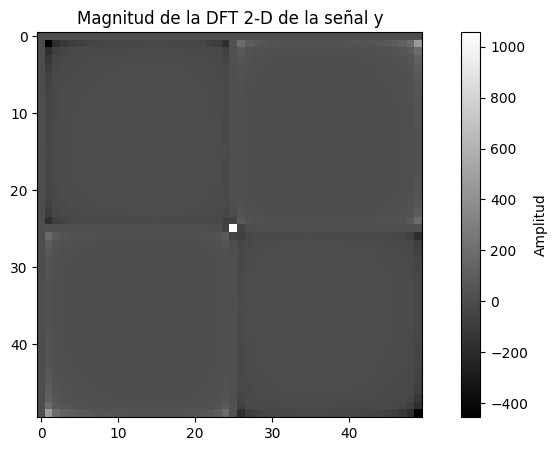

In [43]:
def DFT_2D(x):
    M, N = x.shape
    dft2d = np.zeros((M, N), dtype=complex)
    for m in range(M):
        for n in range(N):
            for k in range(M):
                for l in range(N):
                    e = np.exp(- 2j * np.pi * ((m*k/M) + (n*l/N)))
                    dft2d[m, n] += x[k, l] * e
    return dft2d

# Definir el tiempo
f = 50
t1 = np.linspace(0, 1, 100)

# Señal y original
sen = np.sin(2 * np.pi * f * t1)
cos = np.cos(2 * 2 * np.pi * f * t1)

y = sen + cos

# Seleccionar una parte de la señal (se tuvo que realizar en una seccion acotada ya que no logre hacer que compile de forma correcta en una seccion mayor)
y_part = y[:50]

# Convertir la señal unidimensional en una bidimensional
y_2d = np.outer(y_part, y_part)

# Calcular la DFT 2-D
y_dft2d = DFT_2D(y_2d)
print(np.real(y_2d))

# Grafica de la magnitud de la DFT 2-D
plt.figure(figsize=(10,5))
plt.imshow(np.real(y_dft2d), cmap='gray')
plt.title('Magnitud de la DFT 2-D de la señal y')
plt.colorbar(label='Amplitud')
plt.show()

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

Se generaron 2 tipos de señales, una señal pura y otra no pura respectivamente

\begin{align*}
y & = \sin(2 \pi f t) \cdot cos(2 \cdot 2 \pi f t) \\
y2 & = \sin(3 \cdot 2 \pi f t) \cdot cos(4 \cdot 2 \pi f t) \\
\end{align*}

Siendo esta ultima a la cual se le agrego un ruido gaussiano por medio de la función de densidad de probabilidad.
El ruido gaussiano puede distorsionar tanto la señal en el dominio del tiempo como su representación en el dominio de la frecuencia. Aunque la Transformada de Fourier puede revelar las frecuencias dominantes en una señal, la presencia de ruido puede hacer que esta tarea sea más desafiante al introducir componentes de frecuencia adicionales, por lo que es fundamental tener en cuenta el efecto del ruido al analizar señales en aplicaciones de procesamiento de señales.

Para la señal pura, la Transformada de Fourier reveló las frecuencias dominantes de la señal, que se corresponden con las frecuencias a las que se generaron las funciones seno y coseno. Sin embargo, para la señal no pura, la presencia de ruido gaussiano introdujo variaciones aleatorias en la señal, distorsionando su forma y características. Como resultado, los picos en las frecuencias dominantes no fueron tan claros en la Transformada de Fourier de la señal no pura, y se introdujeron componentes de frecuencia adicionales.


## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html